In [197]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [198]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [199]:
# YOUR CODE HERE

In [201]:
fuel_econ.make.value_counts() >= 80

BMW                   True
Mercedes-Benz         True
Porsche               True
Ford                  True
Chevrolet             True
Audi                  True
MINI                  True
Volkswagen            True
Hyundai               True
Dodge                 True
Lexus                 True
Kia                   True
Cadillac              True
Toyota                True
Infiniti              True
Honda                 True
Jaguar                True
Mazda                 True
Nissan               False
Buick                False
Subaru               False
Chrysler             False
Lincoln              False
Volvo                False
Acura                False
Bentley              False
Mitsubishi           False
Rolls-Royce          False
Maserati             False
Scion                False
Fiat                 False
Ferrari              False
Genesis              False
Aston Martin         False
Suzuki               False
Roush Performance    False
Lotus                False
A

In [ ]:
fuel_econ.comb.

In [202]:
fuel_econ.make.value_counts().index

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda', 'Nissan', 'Buick', 'Subaru',
       'Chrysler', 'Lincoln', 'Volvo', 'Acura', 'Bentley', 'Mitsubishi',
       'Rolls-Royce', 'Maserati', 'Scion', 'Fiat', 'Ferrari', 'Genesis',
       'Aston Martin', 'Suzuki', 'Roush Performance', 'Lotus', 'Alfa Romeo',
       'Karma'],
      dtype='object')

In [291]:
drop = ['Nissan', 'Buick', 'Subaru', 'Chrysler', 'Lincoln', 'Volvo', 'Acura', 'Bentley', 'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Scion', 'Fiat', 'Ferrari', 'Genesis',   'Aston Martin', 'Suzuki', 'Roush Performance', 'Lotus', 'Alfa Romeo', 'Karma']
drop

['Nissan',
 'Buick',
 'Subaru',
 'Chrysler',
 'Lincoln',
 'Volvo',
 'Acura',
 'Bentley',
 'Mitsubishi',
 'Rolls-Royce',
 'Maserati',
 'Scion',
 'Fiat',
 'Ferrari',
 'Genesis',
 'Aston Martin',
 'Suzuki',
 'Roush Performance',
 'Lotus',
 'Alfa Romeo',
 'Karma']

In [292]:
make_comb = fuel_econ[['make', 'comb']]
make_comb.set_index('make', inplace = True)    # to delete less than makers having less than 80 cars
make_comb = make_comb.drop(index = drop)
make_comb = make_comb.reset_index()            # reset_index
make_comb.make.value_counts().count()

18

In [293]:
make_comb.tail()

,make,comb
3203,Toyota,54.4329
3204,Hyundai,41.0000
3205,Hyundai,42.0000
3206,Lexus,23.0021
3207,Lexus,21.3945


In [294]:
orders = make_comb.groupby('make').comb.mean().sort_values(ascending = False).index
orders

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

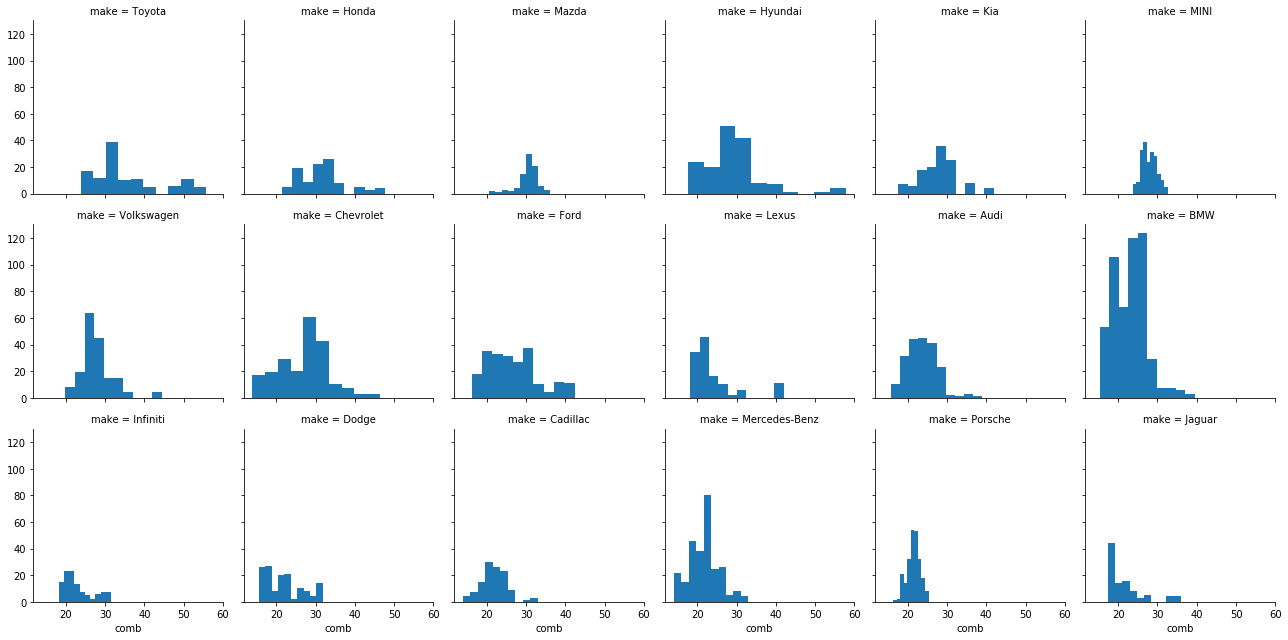

In [295]:
g = sb.FacetGrid(data = make_comb, col = 'make', col_order = orders, col_wrap = 6)
g.map(plt.hist, 'comb');

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


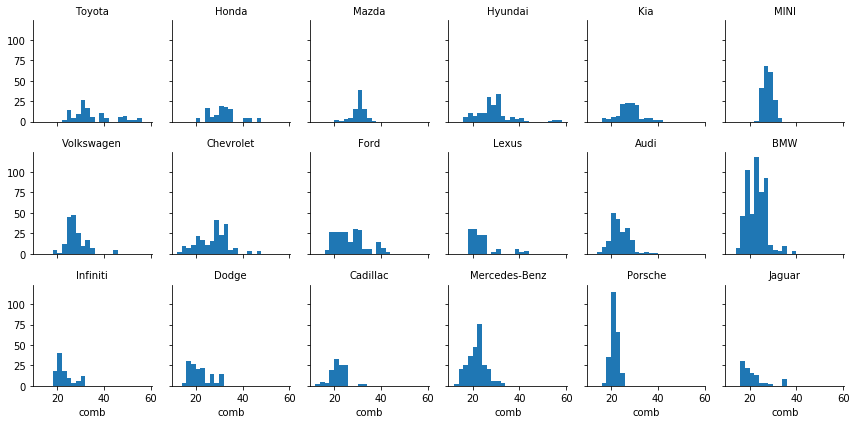

In [110]:
# run this cell to check your work against ours
additionalplot_solution_1()

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [261]:
# YOUR CODE HERE

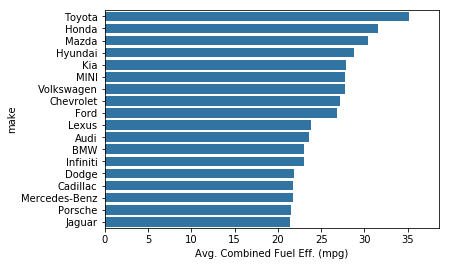

In [267]:
# plt.figure(figsize = [15,15])

sb.barplot(data = make_comb, y = 'make', x = 'comb', color = base_color, order = orders, errwidth = 0);
plt.xlabel('Avg. Combined Fuel Eff. (mpg)');

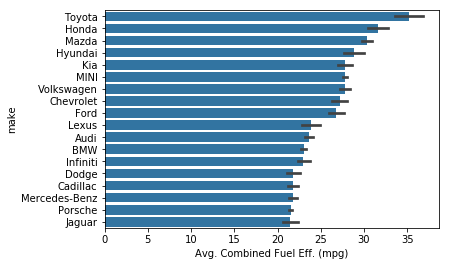

In [268]:
sb.barplot(data = make_comb, y = 'make', x = 'comb', color = base_color, order = orders);
plt.xlabel('Avg. Combined Fuel Eff. (mpg)');

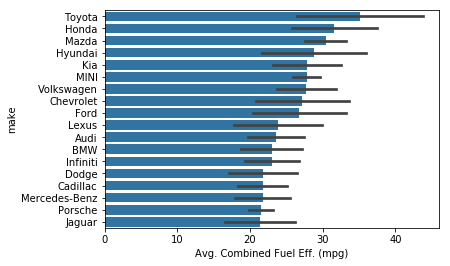

In [290]:
sb.barplot(data = make_comb, y = 'make', x = 'comb', color = base_color, order = orders, ci = 'sd');
plt.xlabel('Avg. Combined Fuel Eff. (mpg)');

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


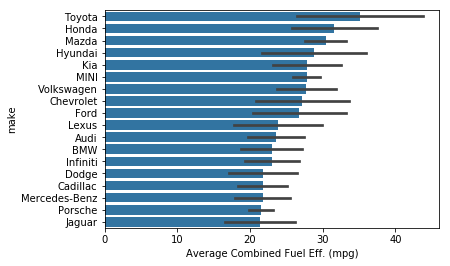

In [263]:
# run this cell to check your work against ours
additionalplot_solution_2()

> mean value